In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


KeyboardInterrupt: 

In [5]:
data = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Claim12.csv", encoding='latin1')


C:\Users\VIP\AppData\Local\Temp\ipykernel_32408\148078192.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Claim12.csv", encoding='latin1')


In [6]:
data.head()

,vsnr,status,spartek,beginn,vtr_dau,str_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,...,ort,plz,alter,anr,SDBEITR5,altgrp,HERSTELLER,LEISTUNG_IN_KW,KILOMETERSTAND_CLEAN,First_reg
0,01011673-002,Storno,KH,01.03.2024,145.0,311.0,05.06.1974,V,39.30,0,...,Tarp,24963,999,71295/ Herr,15.61,7,ORTHOPAEDISCHE-WERKE,NaN,NaN,NaN
1,01011673-002,Storno,TK,01.03.2024,145.0,311.0,05.06.1974,V,24.80,0,...,Tarp,24963,999,71295/ Herr,9.85,7,ORTHOPAEDISCHE-WERKE,NaN,NaN,NaN
2,01013507-009,Aktiv,KH,23.01.2024,494.0,NaN,05.11.1982,V,333.96,0,...,Husby,24975,61,71295/ Herr,405.39,6,MERCEDES-BENZ S. AUCH DAI,115.0,34500.0,23APR2012
3,01013507-009,Aktiv,VK,23.01.2024,494.0,NaN,05.11.1982,V,676.78,0,...,Husby,24975,61,71295/ Herr,804.89,6,MERCEDES-BENZ S. AUCH DAI,115.0,34500.0,23APR2012
4,01020887-005,Storno,TK,01.03.2024,365.0,91.0,10.02.1967,V,24.80,0,...,Böel,24401,92,71295/ Herr,24.80,7,NINGBO,NaN,NaN,NaN


In [7]:
pd.set_option('display.max_columns', None)

In [1]:
data.describe()

NameError: name 'data' is not defined

In [9]:
# Check number of null values in First_reg before dropping
print("Null values in First_reg before dropping:", data['First_reg'].isnull().sum())

# Drop rows where First_reg is null
data = data.dropna(subset=['First_reg'])

# Verify the drop operation
print("\nNull values in First_reg after dropping:", data['First_reg'].isnull().sum())
print("\nNew shape of dataset:", data.shape)

Null values in First_reg before dropping: 45610

Null values in First_reg after dropping: 0

New shape of dataset: (551241, 23)


In [10]:
# Check total number of duplicate rows
print("Total number of duplicate rows:", data.duplicated().sum())

Total number of duplicate rows: 0


In [11]:
data['beginn'] = pd.to_datetime(data['beginn'], format='%d.%m.%Y')
data['beg_year'] = data['beginn'].dt.year


In [12]:
data['kund_beg'] = pd.to_datetime(data['kund_beg'], format='%d.%m.%Y')
data['Cus_Since'] = data['kund_beg'].dt.year



In [13]:
# Convert First_reg to datetime using the correct format
data['First_reg'] = pd.to_datetime(data['First_reg'], format='%d%b%Y')

# Convert to the desired format YYYY-MM-DD
data['First_reg'] = data['First_reg'].dt.strftime('%Y-%m-%d')

# Verify the conversion
print("First few rows of First_reg after conversion:")
print(data['First_reg'].head())

First few rows of First_reg after conversion:
2     2012-04-23
3     2012-04-23
8     2018-07-23
9     2018-07-23
10    2023-03-30
Name: First_reg, dtype: object


In [14]:
# Since First_reg is already in YYYY-MM-DD format, just convert to datetime
data['First_reg'] = pd.to_datetime(data['First_reg'])

# Extract year into Car_regg column
data['Car_regg'] = data['First_reg'].dt.year

# Verify the conversion
print("First few rows after conversion:")
print(data[['First_reg', 'Car_regg']].head())

First few rows after conversion:
    First_reg  Car_regg
2  2012-04-23      2012
3  2012-04-23      2012
8  2018-07-23      2018
9  2018-07-23      2018
10 2023-03-30      2023


In [15]:
# Get today's date
today = pd.Timestamp.today()

# Calculate days and years since registration
data['Days_Since_Reg'] = (today - data['First_reg']).dt.days
data['Years_Since_Reg'] = (data['Days_Since_Reg'] / 365.25).round(2)

# Display the results
print("First few rows showing car age:")
print(data[['First_reg', 'Days_Since_Reg', 'Years_Since_Reg']].head())

# Show some basic statistics
print("\nSummary statistics of vehicle age:")
print(data[['Days_Since_Reg', 'Years_Since_Reg']].describe())

First few rows showing car age:
    First_reg  Days_Since_Reg  Years_Since_Reg
2  2012-04-23            4851            13.28
3  2012-04-23            4851            13.28
8  2018-07-23            2569             7.03
9  2018-07-23            2569             7.03
10 2023-03-30             858             2.35

Summary statistics of vehicle age:
       Days_Since_Reg  Years_Since_Reg
count   551241.000000     551241.00000
mean      4130.218601         11.30790
std       2641.990633          7.23335
min     -64487.000000       -176.56000
25%       2267.000000          6.21000
50%       3750.000000         10.27000
75%       5583.000000         15.29000
max      45871.000000        125.59000


In [16]:
# Get today's date
today = pd.Timestamp.today()

# Calculate days and years since registration
data['Days_Since_Reg'] = (today - data['First_reg']).dt.days
data['Years_Since_Reg'] = (data['Days_Since_Reg'] / 365.25).round(2)

# Display the results
print("First few rows showing car age:")
print(data[['First_reg', 'Days_Since_Reg', 'Years_Since_Reg']].head())

# Show some basic statistics
print("\nSummary statistics of vehicle age:")
print(data[['Days_Since_Reg', 'Years_Since_Reg']].describe())

First few rows showing car age:
    First_reg  Days_Since_Reg  Years_Since_Reg
2  2012-04-23            4851            13.28
3  2012-04-23            4851            13.28
8  2018-07-23            2569             7.03
9  2018-07-23            2569             7.03
10 2023-03-30             858             2.35

Summary statistics of vehicle age:
       Days_Since_Reg  Years_Since_Reg
count   551241.000000     551241.00000
mean      4130.218601         11.30790
std       2641.990633          7.23335
min     -64487.000000       -176.56000
25%       2267.000000          6.21000
50%       3750.000000         10.27000
75%       5583.000000         15.29000
max      45871.000000        125.59000


In [17]:
# Extract everything after '/' in anr column
data['anr'] = data['anr'].str.split('/').str[1]

# Verify the changes
print("First few rows of cleaned anr column:")
print(data['anr'].head())

First few rows of cleaned anr column:
2      Herr
3      Herr
8      Herr
9      Herr
10     Herr
Name: anr, dtype: object


In [18]:
data.HERSTELLER.unique()

array(['MERCEDES-BENZ S. AUCH DAI', 'VOLKSWAGEN-VW', 'TOYOTA (J)', ...,
       'FIEGE TEC', 'VON WUERZEN', 'POLARVAGNEN (S)'],
      shape=(2464,), dtype=object)

In [19]:
data['KILOMETERSTAND_CLEAN'].fillna(0, inplace=True)

C:\Users\VIP\AppData\Local\Temp\ipykernel_32408\2723622540.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['KILOMETERSTAND_CLEAN'].fillna(0, inplace=True)


In [20]:
# Mapping postal codes to states in Germany
# The mapping is based on the first two digits of the postal code (PLZ)
plz_state_mapping = {
    '01': 'Sachsen',
    '02': 'Sachsen',
    '03': 'Brandenburg',
    '04': 'Sachsen',
    '05': 'Sachsen-Anhalt',
    '06': 'Sachsen-Anhalt',
    '07': 'Thüringen',
    '08': 'Sachsen',
    '09': 'Sachsen',

    '10': 'Berlin', '11': 'Berlin', '12': 'Brandenburg',
    '13': 'Brandenburg', '14': 'Brandenburg', '15': 'Brandenburg',
    '16': 'Brandenburg',

    '17': 'Mecklenburg-Vorpommern', '18': 'Mecklenburg-Vorpommern',
    '19': 'Mecklenburg-Vorpommern',

    '20': 'Schleswig-Holstein', '21': 'Schleswig-Holstein',
    '22': 'Hamburg', '23': 'Schleswig-Holstein',

    '24': 'Schleswig-Holstein', '25': 'Schleswig-Holstein',
    '26': 'Niedersachsen', '27': 'Bremen', '28': 'Bremen',
    '29': 'Niedersachsen',

    '30': 'Niedersachsen', '31': 'Niedersachsen', '32': 'Nordrhein-Westfalen',
    '33': 'Nordrhein-Westfalen', '34': 'Hessen',

    '35': 'Hessen', '36': 'Hessen', '37': 'Niedersachsen',
    '38': 'Niedersachsen', '39': 'Sachsen-Anhalt',

    '40': 'Nordrhein-Westfalen', '41': 'Nordrhein-Westfalen',
    '42': 'Nordrhein-Westfalen', '44': 'Nordrhein-Westfalen',
    '45': 'Nordrhein-Westfalen', '46': 'Nordrhein-Westfalen',

    '47': 'Nordrhein-Westfalen', '48': 'Nordrhein-Westfalen',
    '49': 'Niedersachsen',

    '50': 'Nordrhein-Westfalen', '51': 'Nordrhein-Westfalen',
    '52': 'Nordrhein-Westfalen', '53': 'Nordrhein-Westfalen',
    '54': 'Rheinland-Pfalz', '55': 'Rheinland-Pfalz',

    '56': 'Rheinland-Pfalz', '57': 'Nordrhein-Westfalen',
    '58': 'Nordrhein-Westfalen', '59': 'Nordrhein-Westfalen',

    '60': 'Hessen', '61': 'Hessen', '62': 'Hessen',
    '63': 'Hessen', '64': 'Hessen', '65': 'Hessen',

    '66': 'Saarland', '67': 'Rheinland-Pfalz', '68': 'Rheinland-Pfalz',
    '69': 'Hessen',

    '70': 'Baden-Württemberg', '71': 'Baden-Württemberg',
    '72': 'Baden-Württemberg', '73': 'Baden-Württemberg',
    '74': 'Baden-Württemberg', '75': 'Baden-Württemberg',
    '76': 'Baden-Württemberg', '77': 'Baden-Württemberg',
    '78': 'Baden-Württemberg', '79': 'Baden-Württemberg',

    '80': 'Bayern', '81': 'Bayern', '82': 'Bayern', '83': 'Bayern',
    '84': 'Bayern', '85': 'Bayern', '86': 'Bayern', '87': 'Bayern',
    '88': 'Bayern', '89': 'Bayern',

    '90': 'Bayern', '91': 'Bayern', '92': 'Bayern', '93': 'Bayern',
    '94': 'Bayern', '95': 'Bayern', '96': 'Bayern',

    '97': 'Bayern', '98': 'Thüringen', '99': 'Thüringen'
}

def get_state_from_plz(plz):
    if pd.isnull(plz):
        return None
    try:
        plz_str = str(plz).zfill(5)  # ensure it's 5 digits
        return plz_state_mapping.get(plz_str[:2])
    except:
        return None
    
data['state'] = data['plz'].apply(get_state_from_plz)
data['state_id'] = pd.factorize(data['state'])[0]+1
data = data.dropna(subset=['state'])


In [21]:
# Extract everything after '/' in anr column
data['gfeld'] = data['gfeld'].str.split('/').str[1]

# Verify the changes
print("First few rows of cleaned anr column:")
print(data['gfeld'].head())

First few rows of cleaned anr column:
2      Land- und Forstwirtschaft
3      Land- und Forstwirtschaft
8      Land- und Forstwirtschaft
9      Land- und Forstwirtschaft
10                  Selbständige
Name: gfeld, dtype: object


In [22]:
data['status'] = pd.factorize(data['status'])[0]+1
data['spartek'] = pd.factorize(data['spartek'])[0]+1
data['vtrweg'] = pd.factorize(data['vtrweg'])[0]+1
data['gfeld'] = pd.factorize(data['gfeld'])[0]+1
data['ort'] = pd.factorize(data['ort'])[0]+1
data['anr'] = pd.factorize(data['anr'])[0]+1
data['HERSTELLER'] = pd.factorize(data['HERSTELLER'])[0]+1


In [23]:
data['plz'] = pd.factorize(data['plz'])[0]+1

In [24]:
data.head()

,vsnr,status,spartek,beginn,vtr_dau,str_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,altgrp,HERSTELLER,LEISTUNG_IN_KW,KILOMETERSTAND_CLEAN,First_reg,beg_year,Cus_Since,Car_regg,Days_Since_Reg,Years_Since_Reg,state,state_id
2,01013507-009,1,1,2024-01-23,494.0,NaN,1982-11-05,1,333.96,0,70.33,34.20,1,1,1,61,1,405.39,6,1,115.0,34500.0,2012-04-23,2024,1982,2012,4851,13.28,Schleswig-Holstein,1
3,01013507-009,1,2,2024-01-23,494.0,NaN,1982-11-05,1,676.78,0,137.09,82.85,1,1,1,61,1,804.89,6,1,115.0,34500.0,2012-04-23,2024,1982,2012,4851,13.28,Schleswig-Holstein,1
8,01030924-012,1,1,2024-01-31,486.0,NaN,1932-04-02,1,194.48,0,41.63,20.24,1,2,2,64,1,239.93,7,2,110.0,0.0,2018-07-23,2024,1932,2018,2569,7.03,Schleswig-Holstein,1
9,01030924-012,1,2,2024-01-31,486.0,NaN,1932-04-02,1,422.20,0,84.79,51.26,1,2,2,64,1,497.97,7,2,110.0,0.0,2018-07-23,2024,1932,2018,2569,7.03,Schleswig-Holstein,1
10,01030990-018,1,1,2024-03-20,437.0,NaN,1947-09-20,1,413.25,0,87.62,42.61,2,3,3,63,1,505.02,7,3,72.0,0.0,2023-03-30,2024,1947,2023,858,2.35,Schleswig-Holstein,1


In [25]:
# Create new binary column for claims
data['claim_binary'] = (data['SDANZAHL'] > 0).astype(int)

# Verify the conversion
print("First few rows showing original SDANZAHL and new binary column:")
print(data[['SDANZAHL', 'claim_binary']].head(10))

# Show value counts to verify distribution
print("\nDistribution of claims:")
print(data['claim_binary'].value_counts())

First few rows showing original SDANZAHL and new binary column:
    SDANZAHL  claim_binary
2          0             0
3          0             0
8          0             0
9          0             0
10         0             0
11         0             0
14         1             1
15         1             1
22         0             0
23         0             0

Distribution of claims:
claim_binary
0    510465
1     40776
Name: count, dtype: int64


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551241 entries, 2 to 596849
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   vsnr                  551241 non-null  object        
 1   status                551241 non-null  int64         
 2   spartek               551241 non-null  int64         
 3   beginn                551241 non-null  datetime64[ns]
 4   vtr_dau               551241 non-null  float64       
 5   str_dau               150889 non-null  float64       
 6   kund_beg              551241 non-null  datetime64[ns]
 7   vtrweg                551241 non-null  int64         
 8   gesbeitr              551241 non-null  float64       
 9   SDANZAHL              551241 non-null  int64         
 10  kosten_verw           551241 non-null  float64       
 11  kosten_prov           551241 non-null  float64       
 12  gfeld                 551241 non-null  int64         
 13  ort 

In [27]:
data.head(20)

,vsnr,status,spartek,beginn,vtr_dau,str_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,altgrp,HERSTELLER,LEISTUNG_IN_KW,KILOMETERSTAND_CLEAN,First_reg,beg_year,Cus_Since,Car_regg,Days_Since_Reg,Years_Since_Reg,state,state_id,claim_binary
2,01013507-009,1,1,2024-01-23,494.0,NaN,1982-11-05,1,333.96,0,70.33,34.20,1,1,1,61,1,405.39,6,1,115.0,34500.0,2012-04-23,2024,1982,2012,4851,13.28,Schleswig-Holstein,1,0
3,01013507-009,1,2,2024-01-23,494.0,NaN,1982-11-05,1,676.78,0,137.09,82.85,1,1,1,61,1,804.89,6,1,115.0,34500.0,2012-04-23,2024,1982,2012,4851,13.28,Schleswig-Holstein,1,0
8,01030924-012,1,1,2024-01-31,486.0,NaN,1932-04-02,1,194.48,0,41.63,20.24,1,2,2,64,1,239.93,7,2,110.0,0.0,2018-07-23,2024,1932,2018,2569,7.03,Schleswig-Holstein,1,0
9,01030924-012,1,2,2024-01-31,486.0,NaN,1932-04-02,1,422.20,0,84.79,51.26,1,2,2,64,1,497.97,7,2,110.0,0.0,2018-07-23,2024,1932,2018,2569,7.03,Schleswig-Holstein,1,0
10,01030990-018,1,1,2024-03-20,437.0,NaN,1947-09-20,1,413.25,0,87.62,42.61,2,3,3,63,1,505.02,7,3,72.0,0.0,2023-03-30,2024,1947,2023,858,2.35,Schleswig-Holstein,1,0
11,01030990-018,1,2,2024-03-20,437.0,NaN,1947-09-20,1,711.13,0,125.02,75.88,2,3,3,63,1,737.68,7,3,72.0,0.0,2023-03-30,2024,1947,2023,858,2.35,Schleswig-Holstein,1,0
14,01060655-004,1,2,2024-01-01,516.0,NaN,1975-07-21,2,460.34,1,45.48,53.49,3,4,4,86,1,477.44,7,4,88.0,119647.0,2015-04-13,2024,1975,2015,3766,10.31,Schleswig-Holstein,1,1
15,01060655-004,1,1,2024-01-01,516.0,NaN,1975-07-21,2,325.58,1,41.67,39.85,3,4,4,86,1,370.39,7,4,88.0,119647.0,2015-04-13,2024,1975,2015,3766,10.31,Schleswig-Holstein,1,1
22,01071138-001,1,3,2024-04-04,422.0,NaN,1951-10-15,1,55.42,0,9.62,4.35,1,5,5,70,1,51.56,7,5,59.0,187000.0,1991-03-07,2024,1951,1991,12569,34.41,Schleswig-Holstein,1,0
23,01071138-001,1,1,2024-04-04,422.0,NaN,1951-10-15,1,112.18,0,22.51,10.95,1,5,5,70,1,129.75,7,5,59.0,187000.0,1991-03-07,2024,1951,1991,12569,34.41,Schleswig-Holstein,1,0


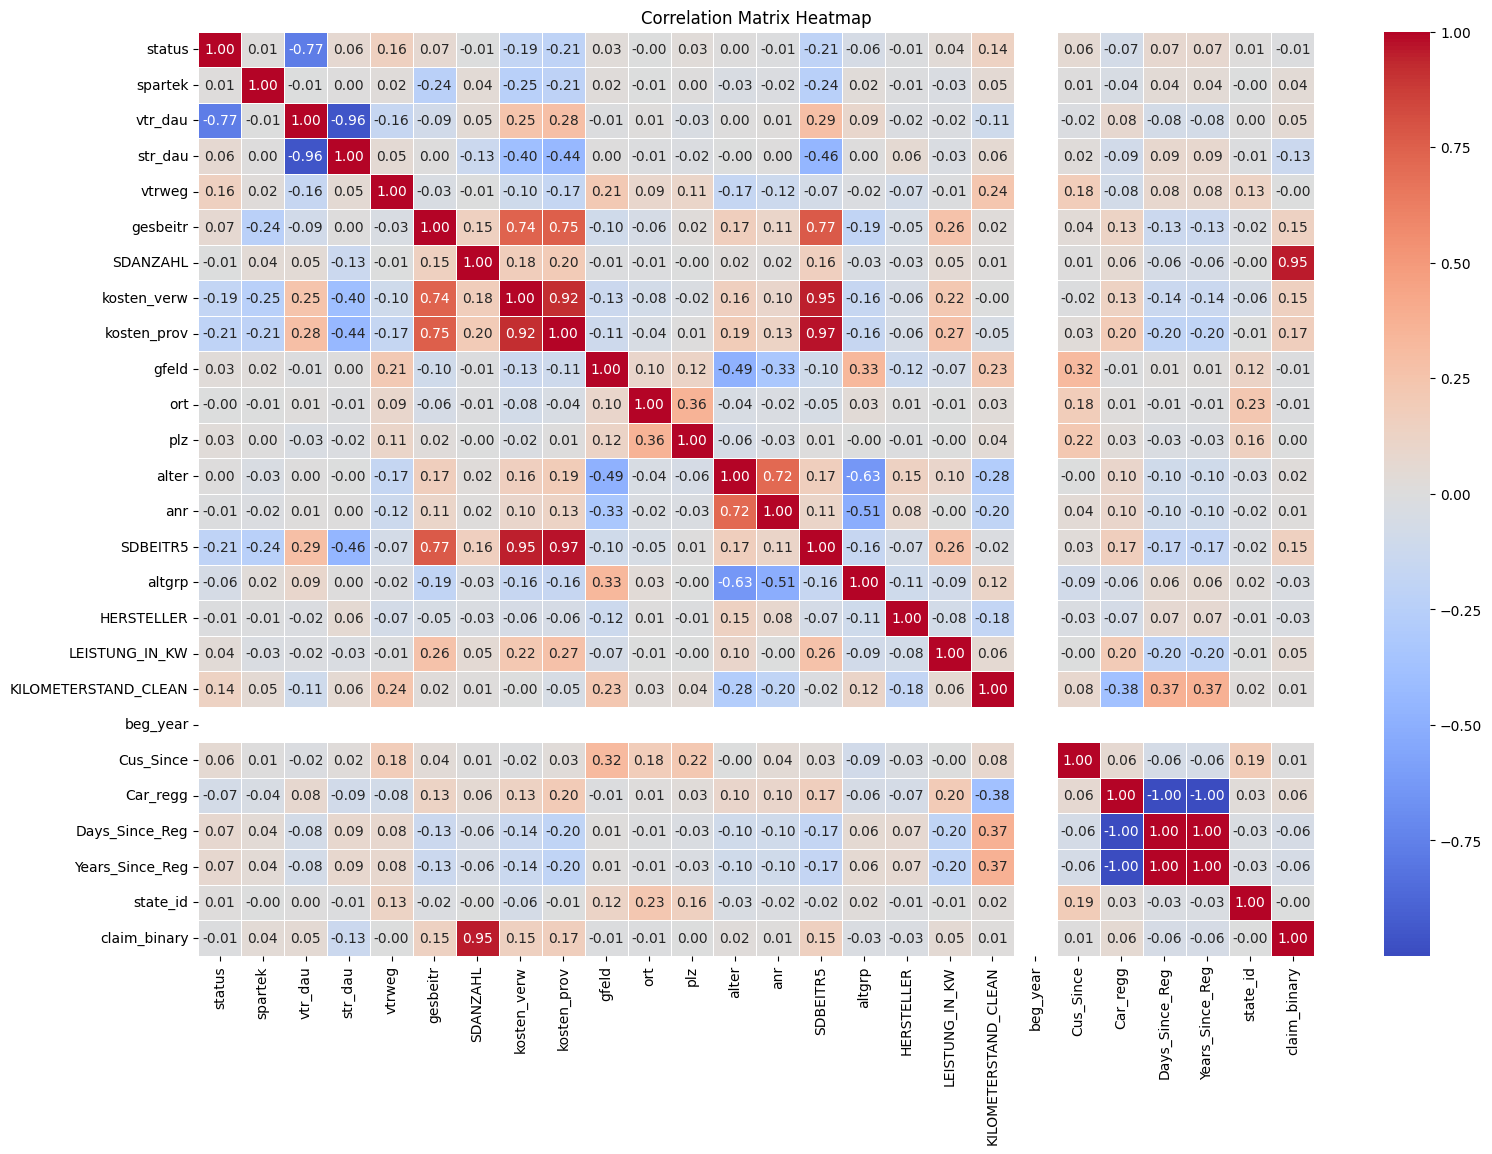

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numerical features
correlation_matrix = data.corr(numeric_only=True)

# Set the size of the heatmap
plt.figure(figsize=(18, 12))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Add a title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()


In [29]:
import tensorflow as tf
from tensorflow import keras    

In [30]:
# Deep Learning Solution for Claim Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class ClaimPredictionModel:
    def __init__(self):
        self.scaler = StandardScaler()
        self.model = None
        self.feature_names = None
        self.target_name = 'claim'
        
    def load_and_explore_data(self, df):
        """Load and explore the dataset"""
        print("Dataset Shape:", df.shape)
        print("\nTarget Variable Distribution:")
        print(df[self.target_name].value_counts())
        print(f"\nTarget Balance: {df[self.target_name].value_counts(normalize=True)}")
        
        return df
    
    def feature_selection(self, df, correlation_threshold=0.1):
        """Select features based on correlation with target variable"""
        # Calculate correlations with target
        correlations = df.corr()[self.target_name].abs().sort_values(ascending=False)
        
        # Remove target variable from correlations
        correlations = correlations.drop(self.target_name)
        
        # Select features above threshold
        selected_features = correlations[correlations >= correlation_threshold].index.tolist()
        
        print(f"Features selected (correlation >= {correlation_threshold}):")
        for feature in selected_features:
            corr_val = df.corr()[self.target_name][feature]
            print(f"  {feature}: {corr_val:.3f}")
        
        # If no features meet threshold, select top 10
        if len(selected_features) == 0:
            selected_features = correlations.head(10).index.tolist()
            print(f"\nNo features met threshold. Using top 10 correlated features:")
            for feature in selected_features:
                corr_val = df.corr()[self.target_name][feature]
                print(f"  {feature}: {corr_val:.3f}")
        
        self.feature_names = selected_features
        return selected_features
    
    def preprocess_data(self, df, selected_features):
        """Preprocess the data for training"""
        # Prepare features and target
        X = df[selected_features].copy()
        y = df[self.target_name].copy()
        
        # Handle missing values
        X = X.fillna(X.median())
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Scale the features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        return X_train_scaled, X_test_scaled, y_train, y_test, X_train, X_test
    
    def build_deep_learning_model(self, input_dim, hidden_layers=[128, 64, 32], dropout_rate=0.3):
        """Build a deep neural network model"""
        model = keras.Sequential()
        
        # Input layer
        model.add(layers.Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
        
        # Hidden layers
        for units in hidden_layers[1:]:
            model.add(layers.Dense(units, activation='relu'))
            model.add(layers.BatchNormalization())
            model.add(layers.Dropout(dropout_rate))
        
        # Output layer (binary classification)
        model.add(layers.Dense(1, activation='sigmoid'))
        
        # Compile model
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'precision', 'recall']
        )
        
        return model
    
    def train_model(self, X_train, X_test, y_train, y_test, epochs=100, batch_size=32):
        """Train the deep learning model"""
        # Build model
        self.model = self.build_deep_learning_model(X_train.shape[1])
        
        # Callbacks
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=10, restore_best_weights=True
        )
        
        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
        )
        
        # Train model
        print("Training Deep Learning Model...")
        history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        
        return history
    
    def evaluate_model(self, X_test, y_test):
        """Evaluate the trained model"""
        # Predictions
        y_pred_proba = self.model.predict(X_test)
        y_pred = (y_pred_proba > 0.5).astype(int).flatten()
        
        # Metrics
        print("\n" + "="*50)
        print("MODEL EVALUATION RESULTS")
        print("="*50)
        
        print(f"Test Accuracy: {np.mean(y_pred == y_test):.4f}")
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
        
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        return y_pred, y_pred_proba
    
    def plot_training_history(self, history):
        """Plot training history"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Accuracy
        axes[0, 0].plot(history.history['accuracy'], label='Training')
        axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
        axes[0, 0].set_title('Model Accuracy')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].legend()
        
        # Loss
        axes[0, 1].plot(history.history['loss'], label='Training')
        axes[0, 1].plot(history.history['val_loss'], label='Validation')
        axes[0, 1].set_title('Model Loss')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Loss')
        axes[0, 1].legend()
        
        # Precision
        axes[1, 0].plot(history.history['precision'], label='Training')
        axes[1, 0].plot(history.history['val_precision'], label='Validation')
        axes[1, 0].set_title('Model Precision')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Precision')
        axes[1, 0].legend()
        
        # Recall
        axes[1, 1].plot(history.history['recall'], label='Training')
        axes[1, 1].plot(history.history['val_recall'], label='Validation')
        axes[1, 1].set_title('Model Recall')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Recall')
        axes[1, 1].legend()
        
        plt.tight_layout()
        plt.show()
    
    def plot_confusion_matrix_and_roc(self, y_test, y_pred, y_pred_proba):
        """Plot confusion matrix and ROC curve"""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title('Confusion Matrix')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('Actual')
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        axes[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
        axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('ROC Curve')
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()
    
    def feature_importance_analysis(self, X_train, y_train):
        """Analyze feature importance using Random Forest"""
        print("\n" + "="*50)
        print("FEATURE IMPORTANCE ANALYSIS")
        print("="*50)
        
        # Train Random Forest for feature importance
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        
        # Get feature importance
        importance_df = pd.DataFrame({
            'feature': self.feature_names,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("Top 10 Most Important Features:")
        print(importance_df.head(10))
        
        # Plot feature importance
        plt.figure(figsize=(10, 8))
        sns.barplot(data=importance_df.head(10), x='importance', y='feature')
        plt.title('Top 10 Feature Importance (Random Forest)')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
        
        return importance_df
    
    def predict_new_data(self, new_data):
        """Make predictions on new data"""
        # Ensure new_data has the same features
        new_data_selected = new_data[self.feature_names]
        new_data_scaled = self.scaler.transform(new_data_selected.fillna(new_data_selected.median()))
        
        # Predict
        predictions_proba = self.model.predict(new_data_scaled)
        predictions = (predictions_proba > 0.5).astype(int).flatten()
        
        return predictions, predictions_proba
    
    def run_complete_pipeline(self, df):
        """Run the complete machine learning pipeline"""
        print("Starting Deep Learning Pipeline for Claim Prediction")
        print("="*60)
        
        # 1. Data exploration
        df = self.load_and_explore_data(df)
        
        # 2. Feature selection
        selected_features = self.feature_selection(df, correlation_threshold=0.05)
        
        # 3. Data preprocessing
        X_train, X_test, y_train, y_test, X_train_orig, X_test_orig = self.preprocess_data(df, selected_features)
        
        # 4. Feature importance analysis
        importance_df = self.feature_importance_analysis(X_train_orig, y_train)
        
        # 5. Train model
        history = self.train_model(X_train, X_test, y_train, y_test)
        
        # 6. Evaluate model
        y_pred, y_pred_proba = self.evaluate_model(X_test, y_test)
        
        # 7. Visualizations
        self.plot_training_history(history)
        self.plot_confusion_matrix_and_roc(y_test, y_pred, y_pred_proba)
        
        return {
            'model': self.model,
            'scaler': self.scaler,
            'selected_features': selected_features,
            'importance_df': importance_df,
            'history': history,
            'test_accuracy': np.mean(y_pred == y_test),
            'test_auc': roc_auc_score(y_test, y_pred_proba)
        }

# Usage Example:
"""
# Load your data
df = pd.read_csv('your_data.csv')  # Replace with your data file

# Initialize and run the pipeline
claim_predictor = ClaimPredictionModel()
results = claim_predictor.run_complete_pipeline(df)

# Make predictions on new data
# new_predictions, new_probabilities = claim_predictor.predict_new_data(new_df)
"""

# Alternative: Simplified version for quick testing
def quick_deep_learning_solution(df, target_col='claim'):
    """Quick implementation for immediate testing"""
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    
    # Prepare data
    X = df.drop(target_col, axis=1).select_dtypes(include=[np.number])
    y = df[target_col]
    
    # Handle missing values
    X = X.fillna(X.median())
    
    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Build model
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train
    history = model.fit(X_train_scaled, y_train, 
                       validation_data=(X_test_scaled, y_test),
                       epochs=50, batch_size=32, verbose=1)
    
    # Evaluate
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    return model, scaler, history

In [33]:
claim_predictor = ClaimPredictionModel()
results = claim_predictor.run_complete_pipeline(data)  # Replace df with your actual DataFrame


Starting Deep Learning Pipeline for Claim Prediction
Dataset Shape: (551241, 31)

Target Variable Distribution:


KeyError: 'claim'

In [34]:
# Check what features were actually used
print("Selected features:", claim_predictor.feature_names)
print("Test accuracy:", results['test_accuracy'])
print("Test AUC:", results['test_auc'])

Selected features: None


NameError: name 'results' is not defined